In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('C:/Users/HP/Desktop/InternSavy/Customer Segmentation Analysis using python/Mall_Customers.csv')


print(data.head(5))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
data.shape

(200, 5)

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.drop(["CustomerID"], axis = 1, inplace=True)
data.columns = ["gender","age","income","spending"]

In [10]:
data.head()

,gender,age,income,spending
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


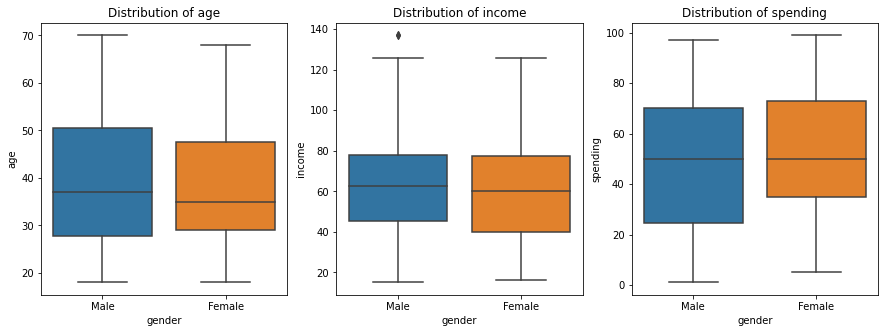

In [11]:
plt.figure(figsize = (15,5))
n = 0
for i in ["age","income","spending"]:
    n +=1
    plt.subplot(1,3,n)
    sns.boxplot(x = data.gender, y  =data[i])
    plt.title("Distribution of {}".format(i))
plt.show()

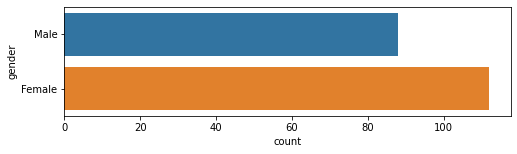

In [12]:
plt.figure(1,figsize = (8,2))
sns.countplot(data = data, y = "gender")
plt.show()

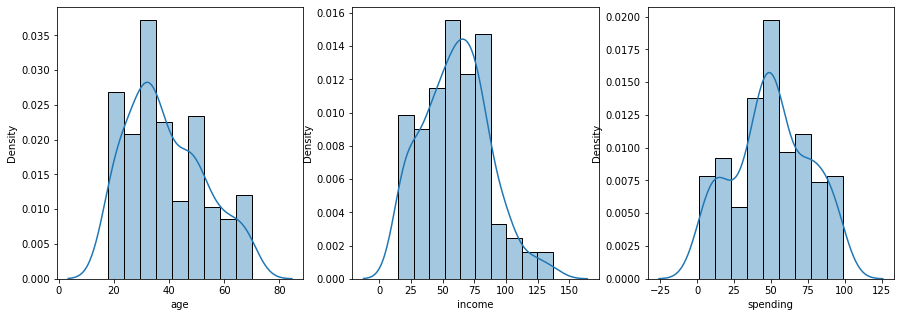

In [13]:
plt.figure(figsize = (15,5))
n = 0
for i in ["age","income","spending"]:
    n = n+1
    plt.subplot(1,3,n)
    sns.histplot(data[i], kde= True,stat = "density",  kde_kws=dict(cut=3), alpha=.4)
    
plt.show()
    

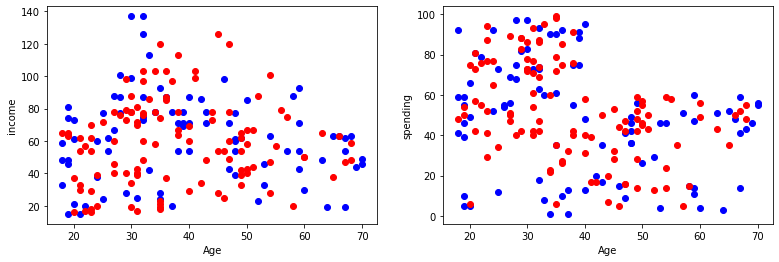

In [14]:
female = data[data.gender == "Female"]
male = data[data.gender == "Male"]

plt.figure(figsize = (13,4))
n = 0
for i in ["income","spending"]:
    n += 1
    plt.subplot(1,2,n)
    plt.scatter(male.age, male[i], color = "blue")
    plt.scatter(female.age, female[i], color = "red")
    plt.xlabel("Age")
    plt.ylabel(i)
plt.show()

In [15]:
data["gender"] = [1 if i == "Male" else 0 for i in data["gender"]]
data.head()
# male = 1
# female = 0

,gender,age,income,spending
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## K-Means Clustering

In [29]:
# With the Elbow Rule, we will try to find the best k value by loop
from sklearn.cluster import KMeans
wcss = []

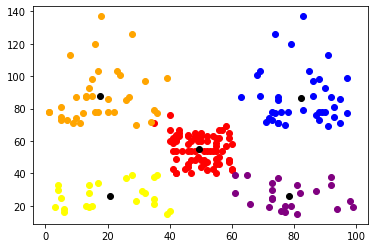

In [19]:
kmeans2 = KMeans(n_clusters=5)

clusters = kmeans2.fit_predict(data)

data["label"] = clusters

plt.scatter(data.spending[data.label == 0], data.income[data.label == 0], color = "red")
plt.scatter(data.spending[data.label == 1], data.income[data.label == 1], color = "blue")
plt.scatter(data.spending[data.label == 2], data.income[data.label == 2], color = "purple")
plt.scatter(data.spending[data.label == 3], data.income[data.label == 3], color = "yellow")
plt.scatter(data.spending[data.label == 4], data.income[data.label == 4], color = "orange")
plt.scatter(kmeans2.cluster_centers_[:,3],kmeans2.cluster_centers_[:,2], color = "black")
plt.show()

In [34]:
data.drop(["CustomerID"], axis = 1, inplace=True)
data.columns = ["gender","age","income","spending"]
data["gender"] = [1 if i == "Male" else 0 for i in data["gender"]]

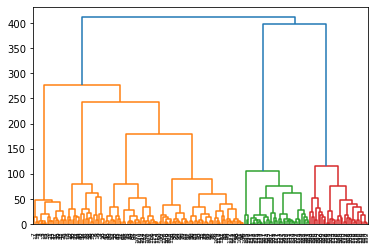

In [35]:
#dendrogram
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(data,method="ward")
dendrogram(merg, leaf_rotation=90, leaf_font_size=6)
plt.show()

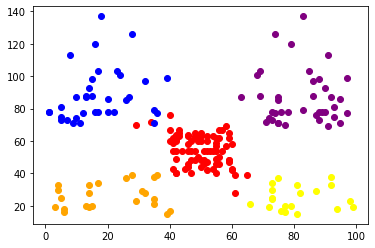

In [36]:
# Hierarcical Clustering
from sklearn.cluster import AgglomerativeClustering
hierarcical_cluster = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage = "ward")
cluster = hierarcical_cluster.fit_predict(data)

data["label"] = cluster

plt.scatter(data.spending[data.label == 0], data.income[data.label == 0], color = "red")
plt.scatter(data.spending[data.label == 1], data.income[data.label == 1], color = "blue")
plt.scatter(data.spending[data.label == 2], data.income[data.label == 2], color = "purple")
plt.scatter(data.spending[data.label == 3], data.income[data.label == 3], color = "yellow")
plt.scatter(data.spending[data.label == 4], data.income[data.label == 4], color = "orange")
plt.show()